=== Task ===
1) Learn about TfidfVectorizer and replace CountVectorizer with TfidfVectorizer (I have provided the explanation below.) 2) Put Multinomial Naive Classification into a class that can transform the data, fit the model and do prediction.

- In the class, allow users to choose whether to use CountVectorizer or TfidfVectorizer to transform the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()
data.target_names
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[0]) #first 300 words
print("Target: ", train.target[0])  #start with 1, soc.religion.christian
train_data = train.data
test_data = test.data


From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [3]:
class MultinomialNB():  
    def transform_data(self, train_data, test_data, method):        
        if method == 'CountVectorizer':
           vectorizer = CountVectorizer()
        
        elif method == 'TfidfVectorizer':
            vectorizer = TfidfVectorizer()

        else:
            raise ValueError('Method must be one of the followings: "CountVectorizer" or "TFidVectorizer"')
        X_train = vectorizer.fit_transform(train_data)
        X_test = vectorizer.transform(test_data)
        X_test = X_test.toarray()
        return X_train,X_test

    def prior(self,X_class):
        return X_class.shape[0] / self.m

    def likelihood(self,X_class, laplace=1):
        return ((X_class.sum(axis=0)) + laplace) / (np.sum(X_class.sum(axis=0) + laplace))    

    def fit(self,X_train,y_train):
        self.m, self.n = X_train.shape
        self.classes = np.unique(y_train)  #list of class
        self.k = len(self.classes) 

        self.priors = np.zeros(self.k) #prior for each classes
        self.likelihoods = np.zeros((self.k, self.n))
        for idx, label in enumerate(self.classes):
            X_train_c = X_train[y_train==label]
            self.priors[idx] = self.prior(X_train_c)
            self.likelihoods[idx, :] = self.likelihood(X_train_c)
        return self.priors, self.likelihoods

    def get_target(self,train_data, test_data):
        y_train = train.target
        y_test = test.target
        return y_train,y_test


    def predict(self,X_test):        
        yhat=  np.log(self.priors) + X_test @ np.log(self.likelihoods.T)
        return np.argmax(yhat, axis=1)

    def report(self,yhat,y_test):
        n_classes = len(np.unique(y_test))

        print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

        print("=========Average precision score=======")
        y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
        yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

        for i in range(n_classes):
            class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
            print(f"Class {i} score: ", class_score)
            
        print("=========Classification report=======")
        print("Report: ", classification_report(y_test, yhat))

    def plot_confusion_matrix(sefl,y_test, yhat):
        mat = confusion_matrix(y_test, yhat)
        sns.heatmap(mat.T, annot=True, fmt="d",
                xticklabels=train.target_names, yticklabels=train.target_names)
        plt.xlabel('true')
        plt.ylabel('predicted')
    


Accuracy:  0.9168994413407822
=========Average precision score=======
Class 0 score:  0.9152047938418233
Class 1 score:  0.9069918620723723
Class 2 score:  0.8429395016564877
Class 3 score:  0.7277310085946386
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432



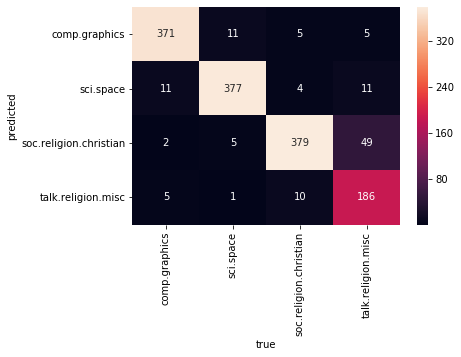

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report
model = MultinomialNB()
X_train, X_test=model.transform_data(train_data, test_data, method='CountVectorizer')
y_train,y_test = model.get_target(train_data, test_data)
model.fit(X_train, y_train)
yhat = model.predict(X_test) 
model.report(yhat,y_test)
model.plot_confusion_matrix(y_test, yhat)

Accuracy:  0.8016759776536313
=========Average precision score=======
Class 0 score:  0.888341920518241
Class 1 score:  0.8744630809734135
Class 2 score:  0.6122064043881043
Class 3 score:  0.332994836297269
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



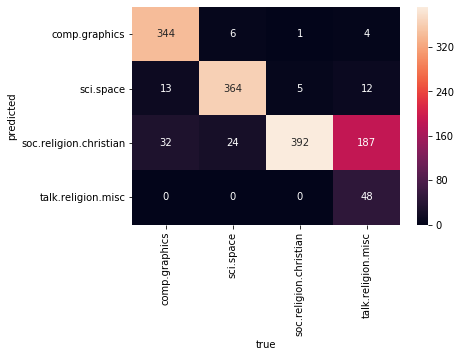

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report
model = MultinomialNB()
X_train, X_test=model.transform_data(train_data, test_data, method='TfidfVectorizer')
y_train,y_test = model.get_target(train_data, test_data)
model.fit(X_train, y_train)
yhat = model.predict(X_test) 
model.report(yhat,y_test)
model.plot_confusion_matrix(y_test,yhat)